<a href="https://colab.research.google.com/github/paulovictorcorreia/Digital-Image-Processing/blob/master/RN_DATA_ANALYSIS_ENEM_2017_UPDATED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction
This is an cleaner and updated version of the notebook used in my graduation final project at UFRN, with improved analysis, and also more organized than the  one used on the project, altough variables will remain with their names in portuguese to facilitate workflow of this project.

It is important to notice, that this notebook uses the same dataset as the previous one, which is the results of the High School National Exam in 2017(Enem 2017), and on future works it is planned to use more educational datasets of the Rio Grande do Norte State. Nonetheless, every step of this work will be detailed and separated in different sections.

The *Exame Nacional do Ensino Médio* (Enem), or High School National Exam, is a test that happens every year in Brazil since late 1990's, and it was created first to analyse the peformance of high schools, evaluating the knowledge of different areas, such as science, mathematics, portuguese, history, geography and writing a essay. Later on the 2000's, government changed the test, making a 180 question mark plus writing an essay, and created the Sisu and Fies, systems in which students could use their grade in the exam to enter public and private universities. Nowadays, Enem is the most accessible way to access higher education, and, because of this, a way to increase social mobility in all classes of our society. Nonetheless, studying the peformance and the profile of the students in each state of Brazil that attended to the test is crutial to improve public politics towards improving education.

In this kernel, we will study the profile of the students of Rio Grande do Norte in following way: we will import a dataset who was already filtered to have only residents of Rio Grande do Norte in 2017, then we will filter the dataset in order to use only non redundant characteristics of the candidate. Then we will have a dataset with this info that will be used to EDA. Than, we will drop all rows with NaN values and use this new dataset to peform a predictive model of the peformance of the student, in order to analyse the most relevant characteristics tha influenced on the peformance. 

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
!ls

Mounted at /gdrive
/gdrive
'My Drive'


# 2 Importing and Cleaning the Data

Now we're going to download libraries to peform analysis, import the dataframe, clean it, improving memory usage and algorithm appliance perfomance.

In between the data cleaning, we may gain some insights and characteristics of the data, by plotting graphics and other EDA on DATA we are going to drop. On the next section, we will make a more meaningful EDA on the dataset to gain more insights.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

enem2017 = pd.read_csv("My Drive/rn_enem_data_analysis/data/enem_rn_2017.csv", sep=';', encoding='ISO-8859-1',index_col='NU_INSCRICAO')
#enem2017['SG_UF_RESIDENCIA'] = enem2017[enem2017['SG_UF_RESIDENCIA'] == 'RN']
#print(enem2017.info(verbose=True, max_cols=10))
print(enem2017.head())
print(enem2017.shape)
print(enem2017.info())

              Unnamed: 0  Unnamed: 0.1  NU_ANO  ...  Q025 Q026  Q027
NU_INSCRICAO                                    ...                 
170003127880           0            32    2017  ...     A    C     A
170006483595           1            33    2017  ...     A    A     B
170003127896           2            65    2017  ...     B    A     D
170001415750           3            73    2017  ...     B    A     D
170001417217           4           169    2017  ...     A    A     A

[5 rows x 138 columns]
(159076, 138)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 159076 entries, 170003127880 to 170002977975
Columns: 138 entries, Unnamed: 0 to Q027
dtypes: float64(31), int64(64), object(43)
memory usage: 168.7+ MB
None


As it is possible to see, there are in total **139 columns** in total to analyze. Although it is seen as good to have a lot of features to use in models, most of this columns are categorical or are redundant. Because of this, we selected all non redundant columns that can give us different info, like family income, sex, request for special care due to a condition of the candidate, the grades of all subjects, etc.

In [3]:
selectedCols = [
    'NO_MUNICIPIO_RESIDENCIA',
    'SG_UF_RESIDENCIA',
    'NU_IDADE',
    'TP_SEXO',
    'TP_ESTADO_CIVIL',
    'TP_COR_RACA',
    'TP_NACIONALIDADE',
    'TP_ST_CONCLUSAO',
    'CO_ESCOLA',
    'CO_MUNICIPIO_ESC',
    'CO_MUNICIPIO_PROVA',
    'TP_DEPENDENCIA_ADM_ESC',
    'TP_LOCALIZACAO_ESC',
    'TP_SIT_FUNC_ESC',
    'TP_ANO_CONCLUIU',
    'TP_ESCOLA',
    'TP_ENSINO',
    'IN_TREINEIRO',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_MT',
    'NU_NOTA_REDACAO',
    'Q001',
    'Q002',
    'Q003',
    'Q004',
    'Q005',
    'Q006',
    'Q007',
    'Q008',
    'Q009',
    'Q010',
    'Q011',
    'Q013',
    'Q014',
    'Q015',
    'Q016',
    'Q017',
    'Q018',
    'Q019',
    'Q020',
    'Q021',
    'Q022',
    'Q023',
    'Q024',
    'Q025',
    'Q026',
    'IN_BAIXA_VISAO',
    'IN_CEGUEIRA',
    'IN_SURDEZ',
    'IN_DEFICIENCIA_AUDITIVA',
    'IN_SURDO_CEGUEIRA',
    'IN_DEFICIENCIA_FISICA',
    'IN_DEFICIENCIA_MENTAL',
    'IN_DEFICIT_ATENCAO',
    'IN_DISLEXIA',
    'IN_DISCALCULIA',
    'IN_AUTISMO',
    'IN_VISAO_MONOCULAR',
    'IN_OUTRA_DEF',
    'IN_GESTANTE',
    'IN_LACTANTE',
    'IN_IDOSO',
    'IN_ESTUDA_CLASSE_HOSPITALAR',
    'IN_SEM_RECURSO',
    'IN_BRAILLE',
    'IN_AMPLIADA_24',
    'IN_AMPLIADA_18',
    'IN_LEDOR',
    'IN_ACESSO',
    'IN_TRANSCRICAO',
    'IN_LIBRAS',
    'IN_LEITURA_LABIAL',
    'IN_MESA_CADEIRA_RODAS',
    'IN_MESA_CADEIRA_SEPARADA',
    'IN_APOIO_PERNA',
    'IN_GUIA_INTERPRETE',
    'IN_COMPUTADOR',
    'IN_CADEIRA_ESPECIAL',
    'IN_CADEIRA_CANHOTO',
    'IN_CADEIRA_ACOLCHOADA',
    'IN_PROVA_DEITADO',
    'IN_MOBILIARIO_OBESO',
    'IN_LAMINA_OVERLAY',
    'IN_PROTETOR_AURICULAR',
    'IN_MEDIDOR_GLICOSE',
    'IN_MAQUINA_BRAILE',
    'IN_SOROBAN',
    'IN_MARCA_PASSO',
    'IN_SONDA',
    'IN_MEDICAMENTOS',
    'IN_SALA_INDIVIDUAL',
    'IN_SALA_ESPECIAL',
    'IN_SALA_ACOMPANHANTE',
    'IN_MOBILIARIO_ESPECIFICO',
    'IN_MATERIAL_ESPECIFICO',
    'IN_NOME_SOCIAL',

]
results = enem2017[selectedCols].copy()
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159076 entries, 170003127880 to 170002977975
Data columns (total 98 columns):
NO_MUNICIPIO_RESIDENCIA        159076 non-null object
SG_UF_RESIDENCIA               159076 non-null object
NU_IDADE                       159075 non-null float64
TP_SEXO                        159076 non-null object
TP_ESTADO_CIVIL                151279 non-null float64
TP_COR_RACA                    159076 non-null int64
TP_NACIONALIDADE               159076 non-null int64
TP_ST_CONCLUSAO                159076 non-null int64
CO_ESCOLA                      28259 non-null float64
CO_MUNICIPIO_ESC               28259 non-null float64
CO_MUNICIPIO_PROVA             159076 non-null int64
TP_DEPENDENCIA_ADM_ESC         28259 non-null float64
TP_LOCALIZACAO_ESC             28259 non-null float64
TP_SIT_FUNC_ESC                28200 non-null float64
TP_ANO_CONCLUIU                159076 non-null int64
TP_ESCOLA                      159076 non-null int64
TP_ENSINO   

This dataframe *results* will be used on a EDA to gain insights over the data. But before, let's check the health of our dataset.

<Figure size 1440x1440 with 0 Axes>

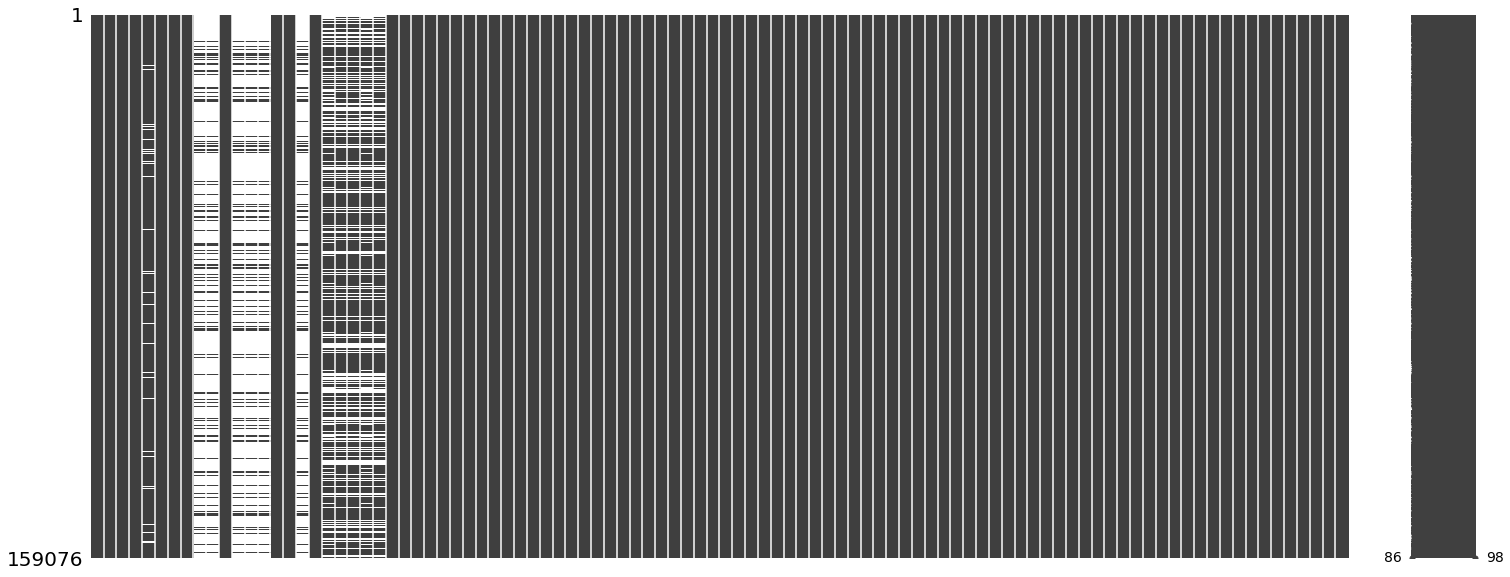

In [4]:
import missingno as msno
%matplotlib inline
plt.figure(figsize=(20, 20))
msno.matrix(results)
plt.show()

We used *missingno* to see data integrity. The black parts of this plot represents non-missing data, and the white parts are missing data of the dataset. As we can see, the first 40 columns approximately have missing data only, and up until the 98th column there are no missing data. So now, let's check the first 40 columns of the dataset to check for the characteristics that have missing values:

<Figure size 1440x1440 with 0 Axes>

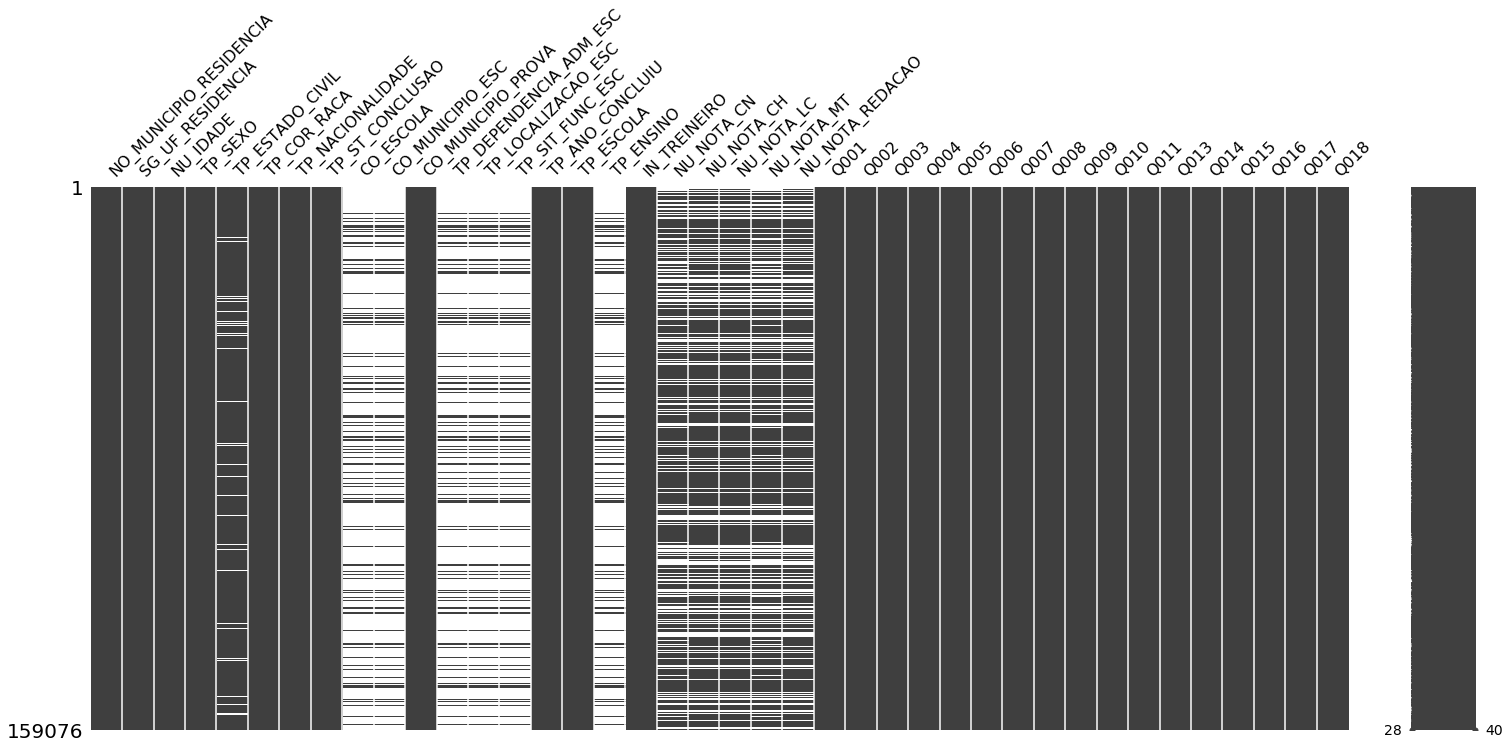

In [5]:
plt.figure(figsize=(20, 20))
msno.matrix(results.iloc[:, :40])
plt.show()

In [6]:
#results.dropna(subset=['TP_ENSINO', 'TP_SIT_FUNC_ESC','TP_LOCALIZACAO_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'CO_MUNICIPIO_ESC', 'CO_ESCOLA', 'TP_ESTADO_CIVIL'], inplace=True)
#results.drop(columns=['TP_ESTADO_CIVIL', 'Q010'], inplace=True)
results.isnull().sum()/results.shape[0]

NO_MUNICIPIO_RESIDENCIA     0.000000
SG_UF_RESIDENCIA            0.000000
NU_IDADE                    0.000006
TP_SEXO                     0.000000
TP_ESTADO_CIVIL             0.049014
                              ...   
IN_SALA_ESPECIAL            0.000000
IN_SALA_ACOMPANHANTE        0.000000
IN_MOBILIARIO_ESPECIFICO    0.000000
IN_MATERIAL_ESPECIFICO      0.000000
IN_NOME_SOCIAL              0.000000
Length: 98, dtype: float64

As we can see, there is about 5 columns with approximately 82% of missing data, and those columns are: CO_ESCOLA, CO_MUNICIPIO_ESC, TP_LOCALIZACAO_ESCOLA, TP_SIT_FUNC_ESCOLA, TP_DEPENDENCIA_ADM_ESC, TP_ENSINO. Those columns are very likely to get dropped, but before, dropping, let's analyse these columns to see if there is anything we could be missing in the analysis.

In [7]:
results.iloc[:, :40].head(15)

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_MUNICIPIO_PROVA,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q013,Q014,Q015,Q016,Q017,Q018
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
170003127880,Janduís,RN,17.0,F,0.0,3,1,3,NaN,NaN,2409308,NaN,NaN,NaN,0,1,NaN,1,440.8,489.5,492.5,438.6,520.0,H,H,A,A,3.0,B,A,B,C,A,A,A,A,A,A,A,A
170006483595,João Câmara,RN,22.0,F,0.0,1,1,1,NaN,NaN,2405801,NaN,NaN,NaN,4,1,NaN,0,549.9,529.3,510.1,526.7,740.0,D,C,B,D,3.0,B,A,B,C,A,A,A,A,A,A,A,A
170003127896,Parnamirim,RN,28.0,F,0.0,2,1,1,NaN,NaN,2408102,NaN,NaN,NaN,10,1,NaN,0,NaN,NaN,NaN,NaN,NaN,F,E,D,F,4.0,H,A,D,D,C,A,A,A,A,B,A,A
170001415750,Açu,RN,26.0,F,0.0,1,1,1,NaN,NaN,2400208,NaN,NaN,NaN,8,1,NaN,0,406.0,608.0,566.6,450.3,560.0,B,C,A,B,2.0,B,A,B,C,A,A,A,A,A,A,A,A
170001417217,Natal,RN,39.0,M,2.0,3,1,1,NaN,NaN,2408102,NaN,NaN,NaN,11,1,NaN,0,495.5,578.5,544.5,689.7,640.0,D,E,C,D,2.0,F,A,B,D,B,A,A,B,A,B,A,B
170003130725,Jardim de Piranhas,RN,25.0,F,0.0,3,1,1,NaN,NaN,2405603,NaN,NaN,NaN,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,B,B,A,A,5.0,D,A,B,B,A,B,A,A,A,A,A,A
170003130723,Areia Branca,RN,44.0,M,1.0,3,1,1,NaN,NaN,2401107,NaN,NaN,NaN,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,B,B,B,A,3.0,B,A,B,B,B,A,A,A,A,A,A,A
170001432396,Natal,RN,35.0,M,0.0,0,1,1,NaN,NaN,2408102,NaN,NaN,NaN,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,B,G,D,D,7.0,H,A,B,C,B,A,A,B,B,B,A,A
170006486473,Pau dos Ferros,RN,21.0,M,0.0,3,1,1,NaN,NaN,2409407,NaN,NaN,NaN,2,1,NaN,0,483.2,428.6,434.4,465.3,400.0,D,G,A,D,3.0,E,A,B,C,B,A,A,A,A,B,A,A


Now we are going to EDA thosse columns that are going to be dropped due to the high number of missing values, since we are going to use a predictive model to analyse features importances.

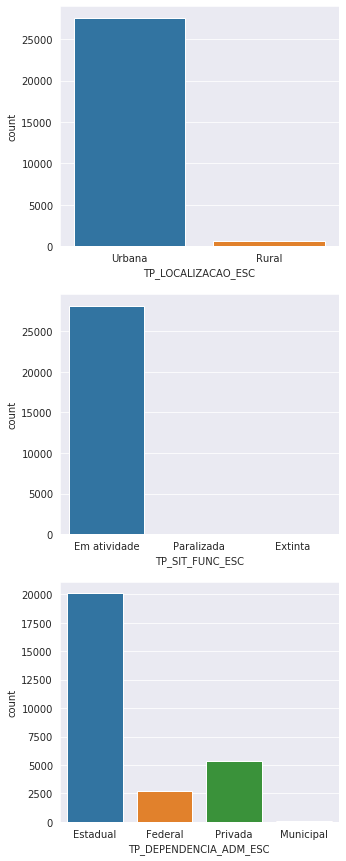

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("darkgrid")

fig, ax = plt.subplots(3, 1)
fig.set_figheight(15)
fig.set_figwidth(5)

variables_drop_df = results.copy()
variables_drop_df['TP_LOCALIZACAO_ESC'] = variables_drop_df['TP_LOCALIZACAO_ESC'].replace({1.0: "Urbana", 2.0:"Rural"})
variables_drop_df['TP_SIT_FUNC_ESC'] = variables_drop_df['TP_SIT_FUNC_ESC'].replace({1.0:"Em atividade", 2.0:"Paralizada", 3.0:"Extinta"})
variables_drop_df['TP_DEPENDENCIA_ADM_ESC'] = variables_drop_df['TP_DEPENDENCIA_ADM_ESC'].replace({1.0:"Federal", 2.0:"Estadual", 3.0:"Municipal", 4.0:"Privada"})

sns.countplot(x='TP_LOCALIZACAO_ESC', data=variables_drop_df, ax=ax[0])
sns.countplot(x='TP_SIT_FUNC_ESC', data=variables_drop_df, ax=ax[1])
sns.countplot(x='TP_DEPENDENCIA_ADM_ESC', data=variables_drop_df, ax=ax[2])
plt.show()

In [9]:
dropCol = [
           'TP_LOCALIZACAO_ESC',
           'TP_SIT_FUNC_ESC',
           'TP_DEPENDENCIA_ADM_ESC',
           'TP_ENSINO',
           'CO_ESCOLA',
           'CO_MUNICIPIO_ESC'
]
print('Localização: ', results.TP_LOCALIZACAO_ESC.unique())
print('Sit_func: ', results.TP_SIT_FUNC_ESC.unique())
print('Tp_depend: ', results.TP_DEPENDENCIA_ADM_ESC.unique())
print('tp_ensino: ', results.TP_ENSINO.unique())

Localização:  [nan  1.  2.]
Sit_func:  [nan  1.  2.  3.]
Tp_depend:  [nan  2.  1.  4.  3.]
tp_ensino:  [nan  1.  3.  2.]


Unfortunately, we cannot determine wether or not the Enem's subscrition system fills the nan values with a valid response nor have the possibility to impute data with 82% of missing data. So we will just drop these columns to maintain the data integrity.

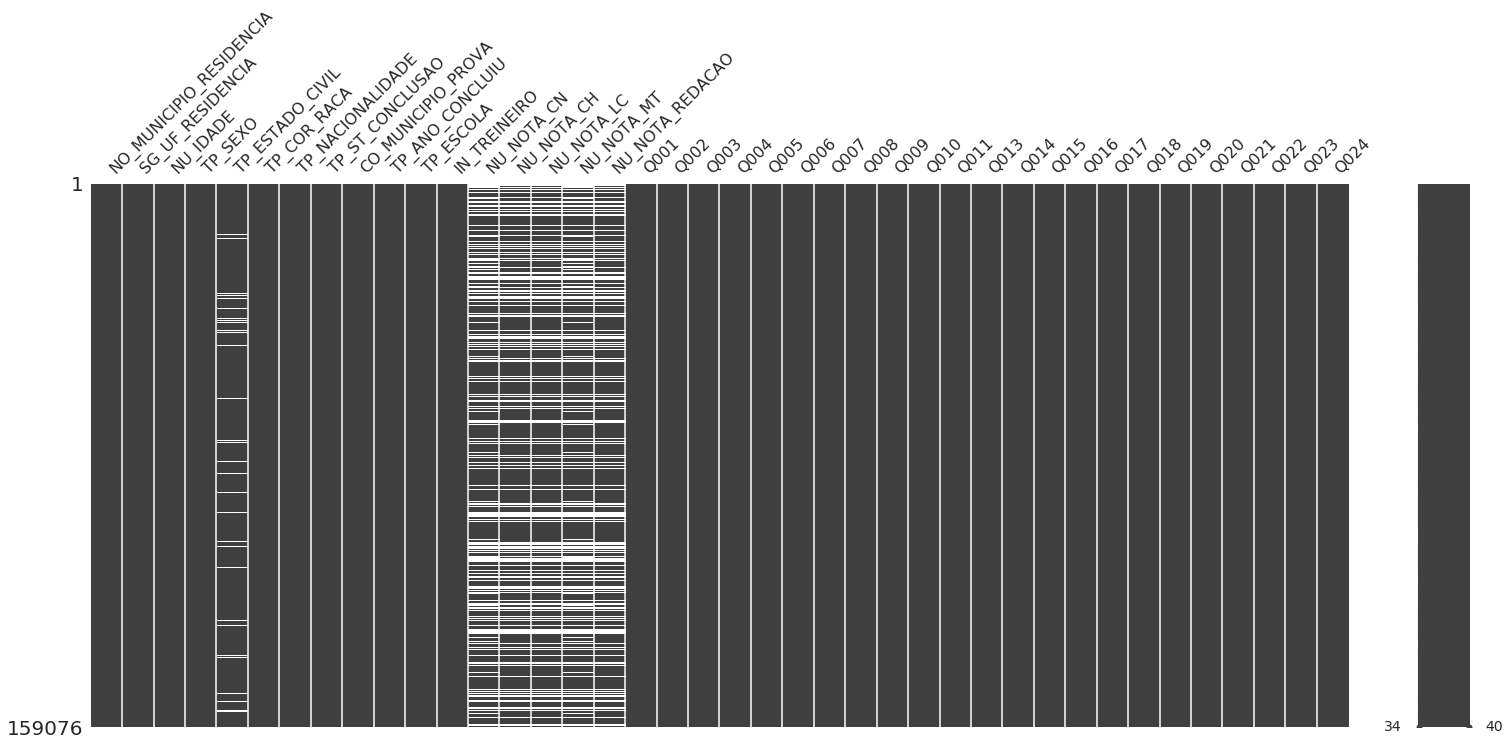

In [10]:
results_dropped = results.drop(labels=dropCol, axis=1)
msno.matrix(results_dropped.iloc[:, :40])

## 2.1 How to deal with the rest of the missing data?
Now, there are only about 6 columns with missing values: the target columns, hence the grades in each of the tests(Natural Science, Mathematics, Human Science, Portuguese, Essay) and the maritial status. Let's check the percentage of missing values in these columns.

In [11]:
missing_cols = ['NU_IDADE'
                'TP_ESTADO_CIVIL',
                'NU_NOTA_CN',
                'NU_NOTA_CH',
                'NU_NOTA_LC',
                'NU_NOTA_MT',
                'NU_NOTA_REDACAO'
]
filter_has_nan_columns = results_dropped.isnull().sum() > 0
results_dropped[filter_has_nan_columns[filter_has_nan_columns].index].isnull().sum()/results_dropped.shape[0] 

NU_IDADE           0.000006
TP_ESTADO_CIVIL    0.049014
NU_NOTA_CN         0.311034
NU_NOTA_CH         0.275409
NU_NOTA_LC         0.275409
NU_NOTA_MT         0.311034
NU_NOTA_REDACAO    0.275409
dtype: float64

### 2.1.1 Maritial Status
There is about 5% of missing data on maritial status, so we have 2 reasonable options: impute the values with the mode of the column or just drop the column. Let's check the mode of the variable first.

In [12]:
print(results_dropped.TP_ESTADO_CIVIL.value_counts( normalize=False))
print(results_dropped.TP_ESTADO_CIVIL.isnull().sum())



0.0    128368
1.0     20118
2.0      2549
3.0       244
Name: TP_ESTADO_CIVIL, dtype: int64
7797


As we can see, according to the dictionary of the data on the Introduction, it's possible to see that the majority of the candidates are single, 128368 of them, and there is 7797 missing values on this columns, corresponding to 5% of the total rows.

Since the data is already biased towards single candidates and it's lessa then 5% of the data, it's *OK* to impute thes values with the mode of the variable. Ideally, bayesian approach of imputing could be used, but since we have only 5% of missing data in this column, we can just impute the way we're going to.

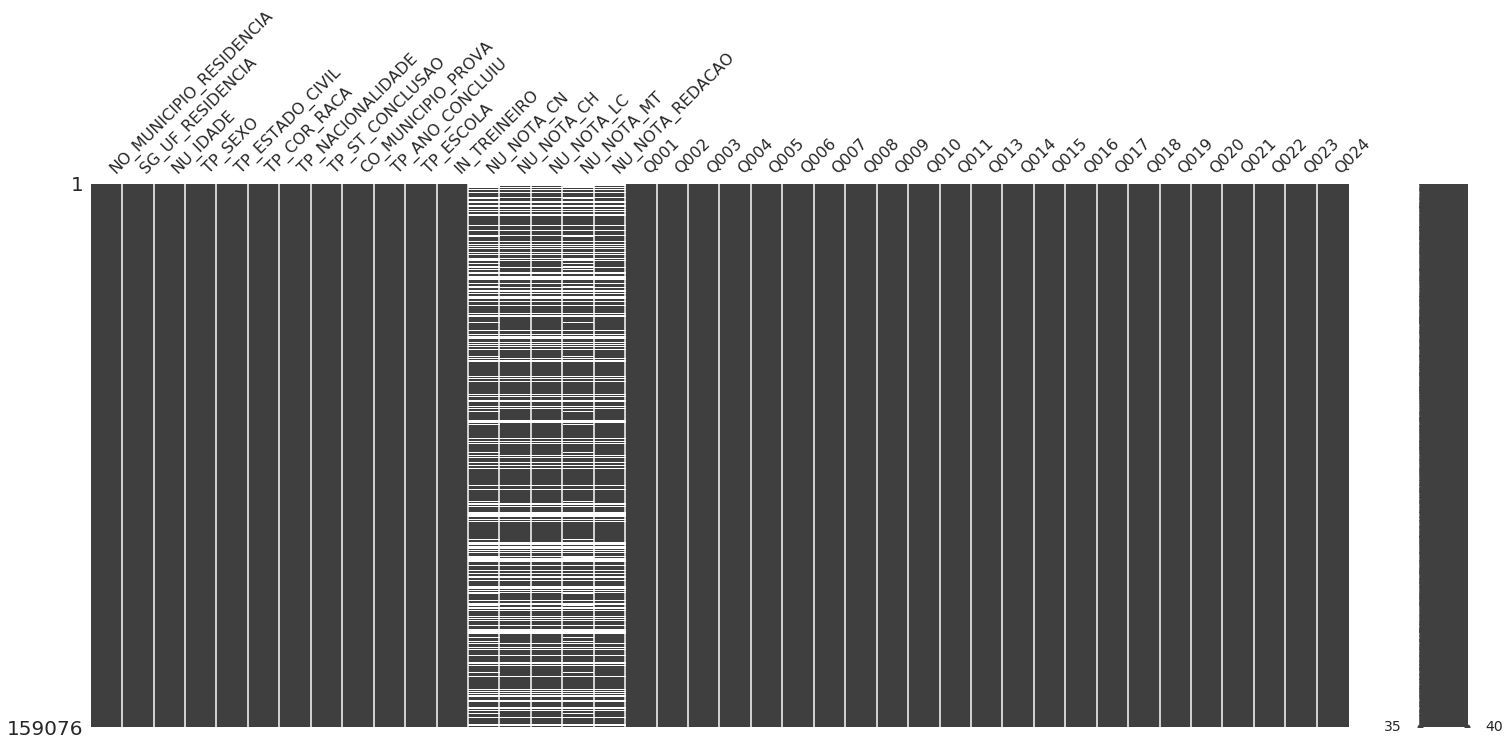

In [13]:
results_imputed = results_dropped.copy()
results_imputed['TP_ESTADO_CIVIL'] = results_imputed['TP_ESTADO_CIVIL'].replace(np.nan, results_imputed['TP_ESTADO_CIVIL'].value_counts().index[0])
msno.matrix(results_imputed.iloc[:, :40])

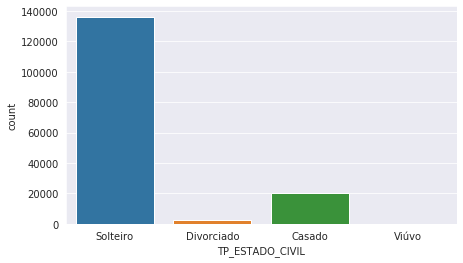

In [14]:
plot_maritial = results_imputed[['TP_ESTADO_CIVIL']].copy()
plot_maritial['TP_ESTADO_CIVIL'] = plot_maritial['TP_ESTADO_CIVIL'].replace({
    0: "Solteiro",
    1: "Casado",
    2: "Divorciado",
    3: "Viúvo"
})
plt.figure(figsize=(7, 4))
sns.countplot(x='TP_ESTADO_CIVIL', data=plot_maritial)

As we can see, most of the candidates are single.

### 2.1.2 NU_IDADE

In this section, we will explore the age of the candidate and drop the *nan* values.

The number of nan rows in the column of age is {1}


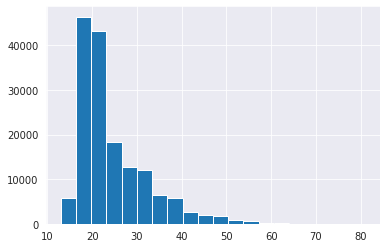

In [15]:
print('The number of nan rows in the column of age is', {results_imputed['NU_IDADE'].isnull().sum()})
results_imputed['NU_IDADE'].hist(bins=20)
plt.show()

The number of nan rows in the column of age is {0}


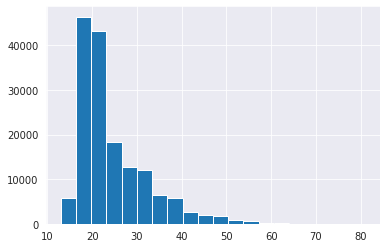

In [16]:
results_imputed.dropna(subset=['NU_IDADE'], inplace=True)
print('The number of nan rows in the column of age is', {results_imputed['NU_IDADE'].isnull().sum()})
results_imputed['NU_IDADE'].hist(bins=20)

As we can see, the distribution of age is left-skewed, meaning that there are more young candidates around 17 and 22 years old than older candidates. 

### 2.1.3 Target Columns

The next step is how we will treat the missing values in the target columns, which are the grades in each one of the subjects of the exam. It is important to notice that the missing values on *NU_NOTA_CH, NU_NOTA_LC* and *NU_NOTA_REDACAO* are the same, and also for *NU_NOTA_CN* and *NU_NOTA_MT* set. The raeson for this is that on this year, they first three subjects happened on the same day and the other two on another day, that's why we have the samme quantity of missing values on these columns, as we can see:

In [17]:
print('Missing values for the first day of the exam: ')
print(results_imputed[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']].isnull().sum()/results_imputed.shape[0])
print()
print('Missing values of the second day of test: ')
print(results_imputed[['NU_NOTA_CN', 'NU_NOTA_MT']].isnull().sum()/results_imputed.shape[0])

Missing values for the first day of the exam: 
NU_NOTA_CH         0.275411
NU_NOTA_LC         0.275411
NU_NOTA_REDACAO    0.275411
dtype: float64

Missing values of the second day of test: 
NU_NOTA_CN    0.311036
NU_NOTA_MT    0.311036
dtype: float64


There is about 27.5% of missing data for the first day of the exam and 31.1% on the second. This means that those candidates were either eliminated in the middle of the exam or missed the test.

One of the ways that we could impute these values, which could be a more realistic approach would be to use the mean of the candidate's school or school administrative unity. Unfortunately, we don't have these columns on our dataset anymore, and we could bias our database if we imputed with the mean of the whole dataset or with the columns we have, since we have about 30% of missing data from this columns. So we will just drop these rows because we would still have approximately ~70% of our dataframe integrity.

In [18]:
results_dropped = results_imputed.dropna()
results_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109399 entries, 170003127880 to 170002977975
Data columns (total 92 columns):
NO_MUNICIPIO_RESIDENCIA        109399 non-null object
SG_UF_RESIDENCIA               109399 non-null object
NU_IDADE                       109399 non-null float64
TP_SEXO                        109399 non-null object
TP_ESTADO_CIVIL                109399 non-null float64
TP_COR_RACA                    109399 non-null int64
TP_NACIONALIDADE               109399 non-null int64
TP_ST_CONCLUSAO                109399 non-null int64
CO_MUNICIPIO_PROVA             109399 non-null int64
TP_ANO_CONCLUIU                109399 non-null int64
TP_ESCOLA                      109399 non-null int64
IN_TREINEIRO                   109399 non-null int64
NU_NOTA_CN                     109399 non-null float64
NU_NOTA_CH                     109399 non-null float64
NU_NOTA_LC                     109399 non-null float64
NU_NOTA_MT                     109399 non-null float64
NU_NOTA_R

We remained with 100k+ of rows with non missing values.  

## 2.2 Analysing column content

In our analysis, all input data we will use in predictive models are categorical. Therefore, each column can assume a limited number of values, and if there are only one value on the column we can drop this column, because it won't give many information to use on predictive model.

In [19]:
colToDrop = []
for col in results_dropped.columns.to_list():
  if len(results_dropped[col].unique()) == 1:
    colToDrop.append(col)
print(colToDrop)

['SG_UF_RESIDENCIA', 'IN_SURDO_CEGUEIRA', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_GUIA_INTERPRETE', 'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO', 'IN_PROVA_DEITADO', 'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MARCA_PASSO', 'IN_SONDA', 'IN_MATERIAL_ESPECIFICO']


These columns have only one value in our database, even though the dictionary says it can assume more than one value. For this reason, in our analysis, we will drop these columns.

But before we drop them, we will see the values in each one of them.

In [20]:
print(len(colToDrop))

for var in colToDrop:
  print(var, ': ', results_dropped[var].unique())

13
SG_UF_RESIDENCIA :  ['RN']
IN_SURDO_CEGUEIRA :  [0]
IN_ESTUDA_CLASSE_HOSPITALAR :  [0]
IN_GUIA_INTERPRETE :  [0]
IN_COMPUTADOR :  [0]
IN_CADEIRA_ESPECIAL :  [0]
IN_CADEIRA_CANHOTO :  [0]
IN_PROVA_DEITADO :  [0]
IN_LAMINA_OVERLAY :  [0]
IN_PROTETOR_AURICULAR :  [0]
IN_MARCA_PASSO :  [0]
IN_SONDA :  [0]
IN_MATERIAL_ESPECIFICO :  [0]


There are 13 columns with just one value in them. The first column, which is *SG_UF_RESIDENCIA* is the state in which the candidate lives, and the state chosen was Rio Grande do Norte.

The other columns are meant to be special care to the candidates that asked for. These special cara may come from handicapped candiates, with problems in vison and hearing, left-handed desks, etc.

According to the dictionary. the values in them are 0, which means that on that year no candidates from RN asked for these special cares that the government could give.

In [21]:
results_dropped2 = results_dropped.drop(colToDrop, axis=1)
results_dropped2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109399 entries, 170003127880 to 170002977975
Data columns (total 79 columns):
NO_MUNICIPIO_RESIDENCIA     109399 non-null object
NU_IDADE                    109399 non-null float64
TP_SEXO                     109399 non-null object
TP_ESTADO_CIVIL             109399 non-null float64
TP_COR_RACA                 109399 non-null int64
TP_NACIONALIDADE            109399 non-null int64
TP_ST_CONCLUSAO             109399 non-null int64
CO_MUNICIPIO_PROVA          109399 non-null int64
TP_ANO_CONCLUIU             109399 non-null int64
TP_ESCOLA                   109399 non-null int64
IN_TREINEIRO                109399 non-null int64
NU_NOTA_CN                  109399 non-null float64
NU_NOTA_CH                  109399 non-null float64
NU_NOTA_LC                  109399 non-null float64
NU_NOTA_MT                  109399 non-null float64
NU_NOTA_REDACAO             109399 non-null float64
Q001                        109399 non-null object
Q002 

## 2.3 Changing column types and values for continuos analysis

We have now selected all the columns that we will work with in the analysis for this notebook. Altough, we still have to fix its types in order to use in a machine learning model.

As we can see from previous output, there are a lot of categorical data as object type. In order to use *sklearn's* tools, for the purpose of this work, we have to convert object types into int64 types and so on.

For high cardinality columns, such as the city of the candidate, we are going to use target encoding, in order to reduce cardinality and transform the variables into numerical features, and use them on our predictive models aside from the MCA analysis, which we will separate the candidates by the 4 regions of the state of Rio Grande do Norte.

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
object_types = results_dropped2.select_dtypes("object")
object_types = object_types.drop('NO_MUNICIPIO_RESIDENCIA', axis=1)
print(object_types.columns)

for col in object_types.columns.to_list():
  object_types[col] = le.fit_transform(object_types[col])
print(object_types.head())

Index(['TP_SEXO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q007', 'Q008',
       'Q009', 'Q010', 'Q011', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
       'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026'],
      dtype='object')
              TP_SEXO  Q001  Q002  Q003  Q004  ...  Q022  Q023  Q024  Q025  Q026
NU_INSCRICAO                                   ...                              
170003127880        0     7     7     0     0  ...     1     0     0     0     2
170006483595        0     3     2     1     3  ...     1     0     0     0     0
170001415750        0     1     2     0     1  ...     2     0     0     1     0
170001417217        1     3     4     2     3  ...     2     0     1     0     0
170006486473        1     3     6     0     3  ...     1     0     1     1     0

[5 rows x 25 columns]


We just label encoded variables that are considered object, and by checking the variables' dictionary, these variables have a certain order, meaning that the higher the value, the "greater" the value of the variable is, due to the fact that most of these variables that begin with "Q" quantifies something. Later, all these steps of preprocessing are going to be on a pipeline.

Now, to futher prepare the data, we will just concatenate the transformed data into a single dataframe.

In [23]:
float_types = results_dropped2.select_dtypes('float64')
int_types = results_dropped2.select_dtypes('int64')


df_adjusted = pd.concat([object_types, float_types, int_types], axis=1)
df_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109399 entries, 170003127880 to 170002977975
Data columns (total 78 columns):
TP_SEXO                     109399 non-null int64
Q001                        109399 non-null int64
Q002                        109399 non-null int64
Q003                        109399 non-null int64
Q004                        109399 non-null int64
Q006                        109399 non-null int64
Q007                        109399 non-null int64
Q008                        109399 non-null int64
Q009                        109399 non-null int64
Q010                        109399 non-null int64
Q011                        109399 non-null int64
Q013                        109399 non-null int64
Q014                        109399 non-null int64
Q015                        109399 non-null int64
Q016                        109399 non-null int64
Q017                        109399 non-null int64
Q018                        109399 non-null int64
Q019                  

The variables with "IN" prefix are binary categorical variables, so theres no further preparation on these columns.

Q005 is the number of people that lives in the house of the candidate, counting from 1 up to 20.

The columns with the "TP" prefix are the ones we are going to preprocess.

In [24]:
adjusting_TP_df = df_adjusted[['TP_ANO_CONCLUIU', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ESTADO_CIVIL', 'TP_SEXO', 'TP_ESCOLA', 'TP_ST_CONCLUSAO']].copy()
set(adjusting_TP_df.TP_ESCOLA)

{1, 2, 3, 4}

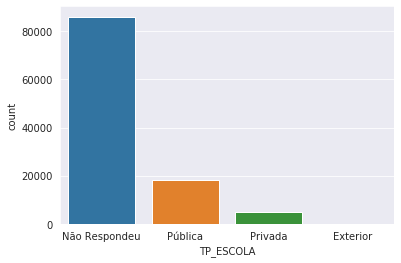

In [25]:
adjusting_TP_df['TP_ESCOLA'] = adjusting_TP_df['TP_ESCOLA'].replace({
    1: "Não Respondeu",
    2: "Pública",
    3: "Privada",
    4: "Exterior"
})

sns.countplot(x='TP_ESCOLA', data=adjusting_TP_df)

As we can see, the majority of the candidates did not answer in which type of school they have studied, later, we will create a subsection in order to understand the reasons to why they did not answer: it could be because of the age of the candidates, and also because they did finish high school a long time ago. For now, we will keep the data cleaning.



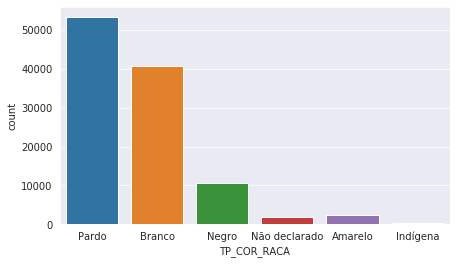

In [26]:
adjusting_TP_df['TP_COR_RACA'] = adjusting_TP_df['TP_COR_RACA'].replace({
    0: "Não declarado",
    1: "Branco",
    2: "Negro",
    3: "Pardo",
    4: "Amarelo",
    5: "Indígena"
})
plt.figure(figsize=(7, 4))
sns.countplot(x='TP_COR_RACA', data=adjusting_TP_df)

In this plot, we can see that most of the candidates have declared themselves as brown, and it could change depending on the state of Brazil, but let's focus on Rio Grande do Norte.

Following the graph, white people are the second most declared skin color of candidates, with 40k people, followed by black people with about 10k. Not declared, yellow and native people have far less than 10k candidates that have declared.

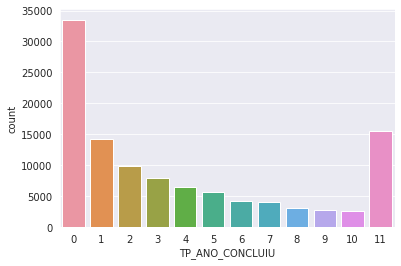

In [27]:
sns.countplot(x='TP_ANO_CONCLUIU', data=adjusting_TP_df)
#adjusting_TP_df['TP_ANO_CONCLUIU'].hist(bins=12)

As we can see, most of the candidates did not declared when they've finished school, and candidates with at least one year that have finished school are on second place in count numbers, up to candidates that have finished school 11+ years before 2017.

In [34]:
# here we are going to export as a csv the dataframe that later will be used on 
#the MCA and t-SNE analysis
df_adjusted.to_csv()
df_adjusted.head()

,TP_SEXO,Q001,Q002,Q003,Q004,Q006,Q007,Q008,Q009,Q010,Q011,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,NU_IDADE,TP_ESTADO_CIVIL,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,CO_MUNICIPIO_PROVA,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_CADEIRA_ACOLCHOADA,IN_MOBILIARIO_OBESO,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_NOME_SOCIAL
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
170003127880,0,7,7,0,0,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,17.0,0.0,440.8,489.5,492.5,438.6,520.0,3.0,3,1,3,2409308,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170006483595,0,3,2,1,3,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,22.0,0.0,549.9,529.3,510.1,526.7,740.0,3.0,1,1,1,2405801,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170001415750,0,1,2,0,1,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,26.0,0.0,406.0,608.0,566.6,450.3,560.0,2.0,1,1,1,2400208,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170001417217,1,3,4,2,3,5,0,1,3,1,0,0,1,0,1,0,1,1,1,0,2,0,1,0,0,39.0,2.0,495.5,578.5,544.5,689.7,640.0,2.0,3,1,1,2408102,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170006486473,1,3,6,0,3,4,0,1,2,1,0,0,0,0,1,0,0,1,1,0,1,0,1,1,0,21.0,0.0,483.2,428.6,434.4,465.3,400.0,3.0,3,1,1,2409407,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2.4 Encoding socioeconomic questions
In thes subsection, we will encode the non-ordinal categorical variables from socioeconomic questionary by one hot encoding them and the oders. The only non-ordinal categories in this questionary are Q003, Q004 and Q027, which doesn't have an order 


# 3 Data visualization
In this section, we will use various types of graphic in order to gain insights over the data.

We will use 2 datasets: the complete dataset that we have without any dropped values, in order to gain insights of the overall characteristics  of the people who lives in Rio Grande do Norte, and the other one is the dataset that we had a special care to drop rows with NaN values.

One way to see it is that the first dataset is the overall population of Rio Grande do Norte who attended to the exam in 2017, and the other dataset is just a sample that we will use in our machine learning models later on this notebook.

In [29]:
!pip install -U pandas_profiling

     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 614kB 44.3MB/s 
     |████████████████████████████████| 235kB 46.2MB/s 
     |████████████████████████████████| 307kB 50.9MB/s 
     |████████████████████████████████| 215kB 50.1MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 737kB 48.6MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=342c46ff152731de13890e6628ef49c0e53f839c0e3cfc42b3ed1576790598b1
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=0de0ff373b9b8bc5b3f59fe1554bd9a0134179ea76c11fd4ed64c35f9b5554d6
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created whee

In [30]:
# This code will be hidden when the notebook is loaded.

import seaborn as sns
import pandas_profiling

sns.set_style("darkgrid")


pandas_profiling.ProfileReport(results)

KeyboardInterrupt: ignored

  As we can see, there is a strong correlation between family income and and the grades of the students, and also with materialistic goods such as cellphones and personal computers at home.

To be able to see data distribution, we will plot a pairplot plot from seaborn package, in order to see histograms of the data and x by y graphs between all continuos variables.

In this first part of EDA, we explored our data just by doing a profile report of the data

# 4 Analysis

## 4.1 Model Creation

In this part, we will use some models to try to predict student grades. Later, we will create a pipeline to try to find the best conditions in which we can evaluate a model, and then use this to try to find the most relevant features in each model.

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import make_scorer

X = df_adjusted.drop(['NU_NOTA_CN', 'NU_NOTA_REDACAO', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH'], axis=1)

y = df_adjusted['NU_NOTA_CN']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82049 entries, 170001989364 to 170002898603
Data columns (total 74 columns):
NO_MUNICIPIO_RESIDENCIA     82049 non-null int64
TP_SEXO                     82049 non-null int64
Q001                        82049 non-null int64
Q002                        82049 non-null int64
Q003                        82049 non-null int64
Q004                        82049 non-null int64
Q006                        82049 non-null int64
Q007                        82049 non-null int64
Q008                        82049 non-null int64
Q009                        82049 non-null int64
Q010                        82049 non-null int64
Q011                        82049 non-null int64
Q013                        82049 non-null int64
Q014                        82049 non-null int64
Q015                        82049 non-null int64
Q016                        82049 non-null int64
Q017                        82049 non-null int64
Q018                        82049 non-nu

In [0]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=20, n_jobs=-1)
mse_scorer = make_scorer(MSE)
cvs = cross_val_score(estimator=rfr, X=X_train, y=y_train, cv=3, n_jobs=-1, scoring=mse_scorer)
print(np.mean(cvs))

3919.864573022632


In [0]:
rfr.fit(X_train.drop('Q006', axis=1), y_train)
y_pred = rfr.predict(X_test.drop('Q006', axis=1))

#cvs = cross_val_score(estimator=rfr, X=X_train, y=y_train, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
print(np.sqrt(np.mean(cvs)))
print(MSE(y_test, y_pred)**0.5)

62.60882184662663
62.837630134112764


In [0]:
importances = dict(zip(X.drop('Q006', axis=1).columns, rfr.feature_importances_))
imp_serie = pd.Series(importances).sort_values(ascending=False)
print(imp_serie.head(20))



Q024                       0.149659
NO_MUNICIPIO_RESIDENCIA    0.072164
NU_IDADE                   0.068967
CO_MUNICIPIO_PROVA         0.062394
Q003                       0.056848
Q002                       0.050974
Q005                       0.050713
Q001                       0.046449
TP_ANO_CONCLUIU            0.040479
Q004                       0.034271
Q022                       0.032581
TP_COR_RACA                0.031139
Q008                       0.024931
Q009                       0.024095
Q019                       0.023566
Q010                       0.022108
TP_SEXO                    0.021904
Q011                       0.017888
Q013                       0.017102
Q020                       0.015474
dtype: float64


In [0]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(imp_serie)

Q006                        2.029715e-01
NO_MUNICIPIO_RESIDENCIA     6.827211e-02
NU_IDADE                    6.465408e-02
CO_MUNICIPIO_PROVA          5.728537e-02
Q005                        4.698302e-02
Q024                        4.455391e-02
Q001                        4.369040e-02
Q002                        4.356127e-02
TP_ANO_CONCLUIU             3.611526e-02
Q003                        3.454040e-02
Q004                        3.061329e-02
Q022                        2.944031e-02
TP_COR_RACA                 2.846175e-02
Q009                        2.240421e-02
Q019                        2.136292e-02
TP_SEXO                     2.012589e-02
Q008                        1.797863e-02
Q010                        1.721590e-02
Q011                        1.646935e-02
Q013                        1.504207e-02
Q020                        1.390169e-02
Q016                        1.309438e-02
Q014                        1.300451e-02
TP_ESCOLA                   1.092581e-02
Q021            

In [0]:
rfr2 = RandomForestRegressor(random_state=42)
param_search = {
    'n_estimators': [5, 10, 20, 30],
    'max_depth': [10, 15, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rfr2, param_grid=param_search, cv=3)
grid_search.fit(X_train, y_train)
print('Melhor pontuação: ', grid_search.best_score_)
print('Melhor modelo: ', grid_search.best_estimator_)

KeyboardInterrupt: ignored

In [0]:
print(MSE(y_test,grid_search.best_estimator_.predict(X_test))**0.5)

In [0]:
importances = dict(zip(df_adjusted.columns, rfr.feature_importances_))
imp_serie = pd.Series(importances)
imp_serie.sort_values(ascending=False)

## 4.2 Creating Pipeline

We will use sklearn package pipeline and tpot package to create pipelines to find the best model.

In [0]:
!pip install tpot
tpot.TPOTRegressor?

Object `tpot.TPOTRegressor` not found.


In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82049 entries, 170001989364 to 170002898603
Data columns (total 74 columns):
NO_MUNICIPIO_RESIDENCIA     82049 non-null int64
TP_SEXO                     82049 non-null int64
Q001                        82049 non-null int64
Q002                        82049 non-null int64
Q003                        82049 non-null int64
Q004                        82049 non-null int64
Q006                        82049 non-null int64
Q007                        82049 non-null int64
Q008                        82049 non-null int64
Q009                        82049 non-null int64
Q010                        82049 non-null int64
Q011                        82049 non-null int64
Q013                        82049 non-null int64
Q014                        82049 non-null int64
Q015                        82049 non-null int64
Q016                        82049 non-null int64
Q017                        82049 non-null int64
Q018                        82049 non-nu

In [0]:
from tpot import TPOTRegressor

grade_predictor = TPOTRegressor(generations=10, population_size=25, verbosity=3, cv=4, scoring=mse_scorer)#, template='FeatureSetSelector-Transformer-Classifier')
grade_predictor.fit(X_train, y_train)

print(np.sqrt(np.mean(cvs)))
print(MSE(y_test, grade_predictor.predict(X_test)))
print(grade_predictor.score(X_test, y_test))

29 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Skipped pipeline #32 due to time out. Continuing to the next pipeline.
Generation 1 - Current Pareto front scores:
-1	214752.42837025842	XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.001, XGBRegressor__max_depth=1, XGBRegressor__min_child_weight=18, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__objective=reg:squarederror, XGBRegressor__subsample=0.9000000000000001)

_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
Skipped pipeline #70 due to time out. Continuing to the next pipeline.
Generation 2 - Current Pare

In [0]:
print(MSE(y_test, grade_predictor.predict(X_test))**0.5)
print(grade_predictor.score(X_test, y_test)**0.5)

465.1224129410847
465.1224129410847


## 4.3 Selecting features with chi2

In this subsection, we will use some feature selection with chi2 metrics, which gives us association between categorical variables. Also, we will use sklearn implementation so we don't need to change the data.

The methods for selecting the features are SelectKBest and RFE

In [0]:
from sklearn.feature_selection import chi2, SelectKBest, RFE

selectedNew = SelectKBest(chi2, k=30).fit_transform(X, y)
selectedNew.head()

ValueError: ignored